# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [1]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [2]:
# Create a new `DataFrame`
df = df[df.dt >= ('1950-01-01')]
df.reset_index(drop=True, inplace=True)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

C:\Users\张佳\AppData\Local\Temp\ipykernel_27344\2529875463.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_T = df_T.groupby(df_T.dt.dt.year).mean() # Average Temperature


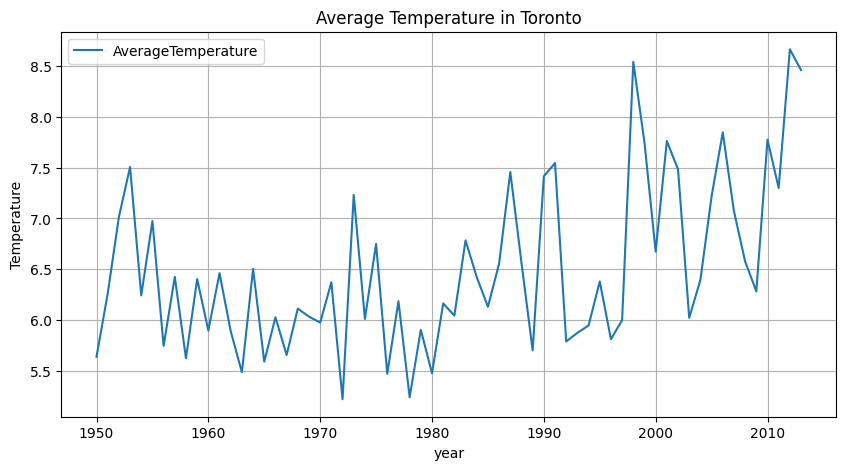

In [3]:
# Plot the average annual temperature in the city of Toronto.
df_T = df[df.City == 'Toronto']
df_T = df_T.groupby(df_T.dt.dt.year).mean() # Average Temperature
df_T.plot(y='AverageTemperature', figsize=(10, 5), title='Average Temperature in Toronto')
plt.xlabel('year')
plt.ylabel('Temperature')
plt.grid()
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [4]:
df_city = df.groupby('City').var()
df_city.AverageTemperature.idxmax()


C:\Users\张佳\AppData\Local\Temp\ipykernel_27344\1693231604.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city = df.groupby('City').var()


'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).


C:\Users\张佳\AppData\Local\Temp\ipykernel_27344\1826316346.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city_var = df.groupby('Latitude').var()
C:\Users\张佳\AppData\Local\Temp\ipykernel_27344\1826316346.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_city_1= df_city_1.groupby(df['Latitude']).mean()
C:\Users\张佳\AppData\Local\Temp\ipykernel_27344\1826316346.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

(<AxesSubplot: xlabel='Latitude'>, <matplotlib.legend.Legend at 0x18f1545bcd0>)

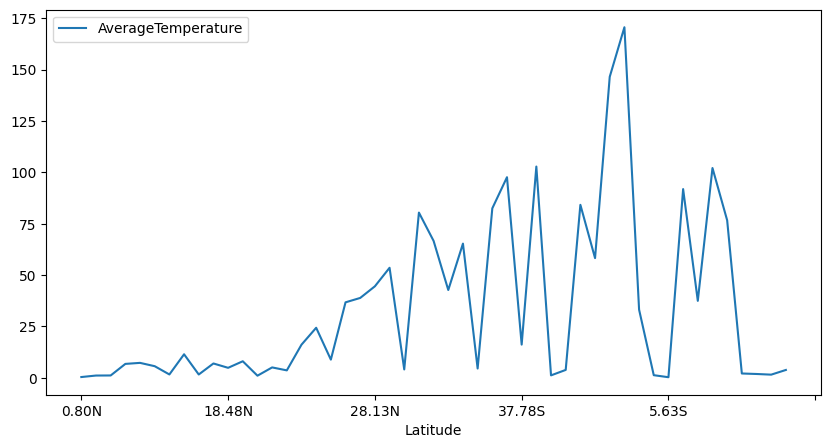

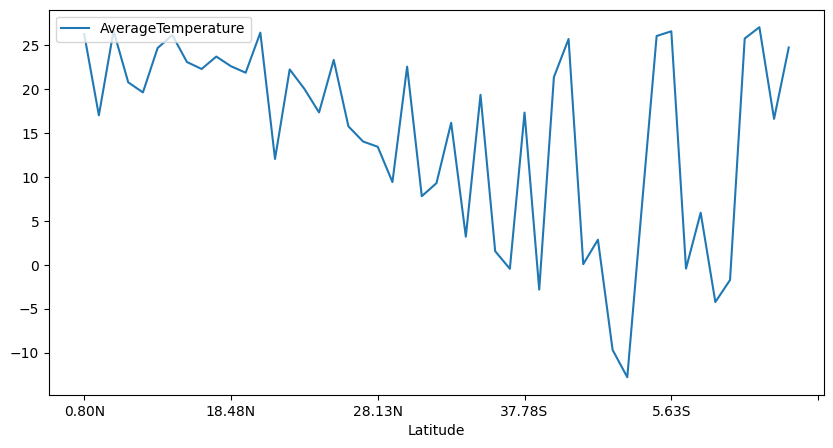

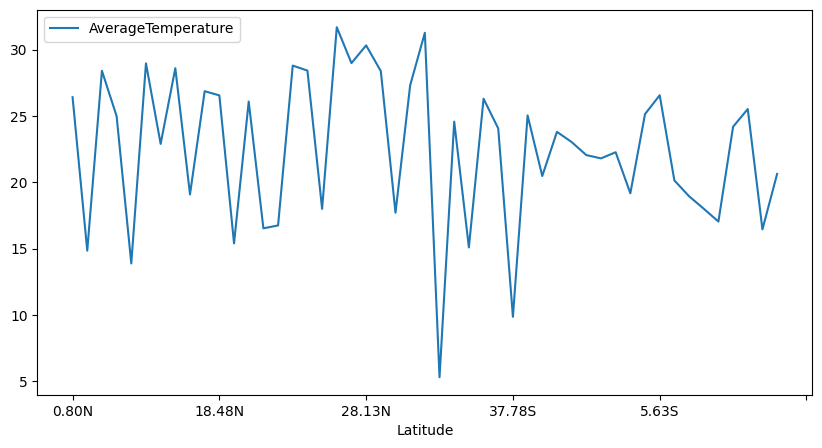

In [5]:
# Plot the dependence of the sampling variance of temperature on the latitude of the city.
df_city_var = df.groupby('Latitude').var()
df_city_1= df[df.dt == pd.Timestamp('1975-01-01')]
df_city_1= df_city_1.groupby(df['Latitude']).mean()
df_city_7 = df[df.dt == pd.Timestamp('1975-07-01')]
df_city_7= df_city_7.groupby(df['Latitude']).mean()
df_city_var.plot(y='AverageTemperature', figsize=(10, 5)),plt.legend(loc='upper left')
df_city_1.plot(y='AverageTemperature', figsize=(10, 5)),plt.legend(loc='upper left')
df_city_7.plot(y='AverageTemperature', figsize=(10, 5)),plt.legend(loc='upper left')


# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 




C:\Users\张佳\AppData\Local\Temp\ipykernel_27344\312872010.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Df_spb = df[df.City == 'Saint Petersburg'].groupby(df.dt.dt.year).mean()


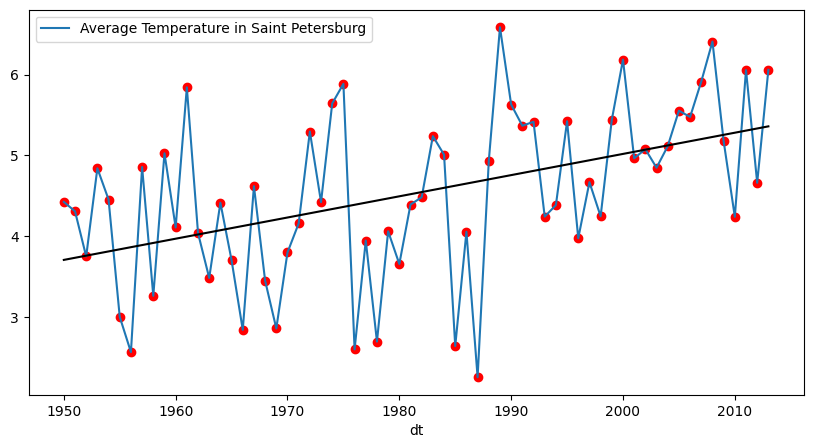

In [6]:
from scipy.signal import argrelextrema
from numpy import greater_equal
from sklearn.linear_model import LinearRegression
# Plot the dependence of the sampling variance of temperature on the latitude of the city.

Df_spb = df[df.City == 'Saint Petersburg'].groupby(df.dt.dt.year).mean()
Df_spb['AverageTemperaturePrev'] = Df_spb.AverageTemperature.shift(1)
Df_spb['AverageTemperatureNext'] = Df_spb.AverageTemperature.shift(-1)
Df_spb.plot(y='AverageTemperature', figsize=(10, 5), label="Average Temperature in Saint Petersburg")
local_max = Df_spb.iloc[argrelextrema(Df_spb['AverageTemperature'].values,
                                           greater_equal,
                                           order=1)[0]]
plt.scatter(Df_spb.index, Df_spb.AverageTemperature, c='red')
# Linear Regression
X = Df_spb.index.values.reshape(-1, 1)
y = Df_spb.AverageTemperature.values.reshape(-1, 1)
Model = LinearRegression()
Model.fit(X, y)
y_p = Model.predict(X)
plt.plot(X, y_p, c='black')
plt.show()




# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество дней с отрицательной температурой в году.


In [7]:
# Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна
max_annualy_temp_city = df.groupby([df.dt.dt.year, 'City'])['AverageTemperature'].apply(max).groupby('City').max()
min_annualy_temp_city = df.groupby([df.dt.dt.year, 'City'])['AverageTemperature'].apply(min).groupby('City').min()
(max_annualy_temp_city - min_annualy_temp_city).idxmax()

'Harbin'

In [8]:
#2. Самая большая средняя разница между средней температурой января и средней температурой июля.
january_avg = df[df.dt.dt.month == 1].set_index(['City'])['AverageTemperature']
july_avg= df[df.dt.dt.month == 7].set_index(['City'])['AverageTemperature']
avg_diff_january_july = (abs(january_avg - july_avg)).groupby('City').mean()
avg_diff_january_july.idxmax()

'Harbin'

In [9]:
# 3. Наибольшее среднее количество дней с отрицательной температурой в году.
not_nan_temp = df[~df['AverageTemperature'].isna()].groupby('City').count()['dt']
negative_temp = df[df['AverageTemperature'] < 0].groupby('City').count()['dt']
(negative_temp / not_nan_temp).idxmax()

'Harbin'

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) Используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и угол наклона последнего сегмента. 

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*